# Part II - Analysis on US flights between 2007-08
## by Ali Atif

Main summary notes:
    The month of september had the longest mean security delays across the year.
    Carrier cancellations were the most common reason why flights were cancelled.
    MQ(Envoy Air), AA(American Airlines) were the main airlines who cancelled their flights.

## Investigation Overview


The goal of this investigation was to gain an insight on flight delays and cancellations.

The main findings determined:
- Determining the airlines who were the biggest cancellers of their flights.
- The month with the longest mean security delays per flight.
- Determining the main cause of flight cancellations.


## Dataset Overview

The dataset name is "Airline On-Time Performance Data". This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008.
A portion of this data set was analysed between 2007-2008 (during the financial crisis).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
a2007 = pd.read_csv('2007.csv')
b2008 = pd.read_csv('2008.csv')
df = pd.concat([a2007, b2008])

## Main cause of flight cancellations 

- The graph below clearly illustrates that carrier was the most common cause of flight cancellations, closely followed by weather cancellations.
- There were almost 0 security cancellations witin the timeframe investigated.

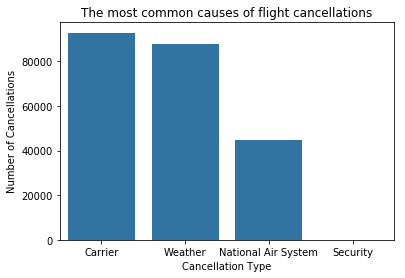

In [6]:
base_color=sb.color_palette()[0]
fig = sb.countplot(data=df, x='CancellationCode', color=base_color,order=['A','B','C','D'])

fig.set(xlabel='Cancellation Type', ylabel='Number of Cancellations')
fig.set_xticklabels(['Carrier','Weather','National Air System','Security']);
fig.set_title('The most common causes of flight cancellations');

## Investigating which carrier has the most cancellations

From the prevous figure we can clearly see carriers were the most common cause of cancellations.
We can look into this and identify MQ(Envoy Air) and AA(American Airlines) were the two main airlines who cancelled their flights.

In [8]:
df_cancellation = df.query('CancellationCode in ["A","B","C","D"]')

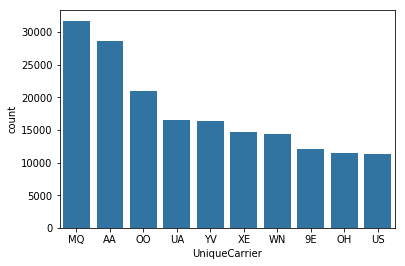

In [9]:
sb.countplot(data=df_cancellation, 
             x="UniqueCarrier", 
             color=base_color,
             order=pd.value_counts(df_cancellation['UniqueCarrier']).iloc[:10].index
            );

## Investigating which month may have the longest security delays (if there is a bias)

Security delays should be uniform as the safety checks of the flights should be constant throughout the year however analysis has found that September has longer security check delays compared to the rest of the year.

In [ ]:
security_delay_month = df.query('SecurityDelay>0').groupby('Month')['SecurityDelay'].mean().reset_index(name='Security Delay')


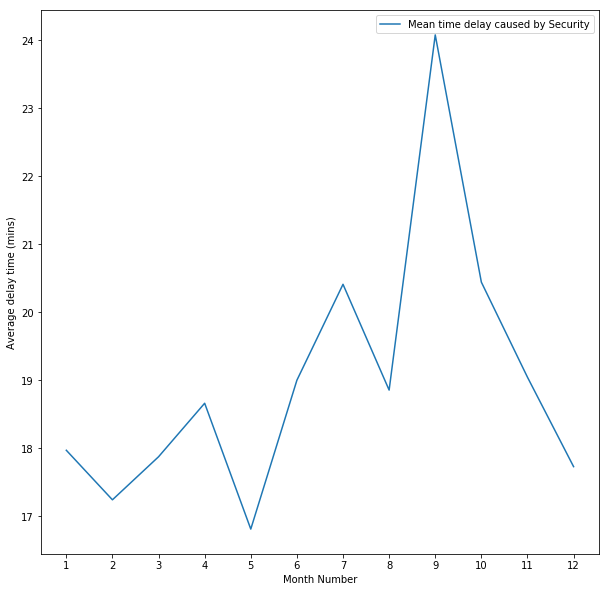

In [10]:
plt.figure(figsize=(10,10))
plt.errorbar(x=security_delay_month.Month, y=security_delay_month['Security Delay'])

plt.xlabel('Month Number')
plt.ylabel('Average delay time (mins)')
plt.legend(['Mean time delay caused by Security']);
plt.xticks(security_delay_month.Month);


In [13]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_slide_deck>.ipynb --to slides --post serve --no-input --no-prompt

/bin/sh: 1: cannot open Part_II_slide_deck: No such file


In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide.

To save as a zip file, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory.